In [119]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [120]:
URL = 'https://worldtable.info/gosudarstvo/tablica-rozhdaemosti-po-godam-rossija.html'
HEADERS = {'user-agent': 'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36', 'accept':'*/*'}

In [121]:
def get_html(url:str, params=None):
    request = requests.get(url, headers=HEADERS, params=params)
    return request

In [122]:
def get_content(html:str):
    soup = BeautifulSoup(html, 'html.parser')
    items = soup.find_all('tr')
    year = []
    quantity = []
    for item in items:
        quantity.append(item.find_all('td')[1].get_text())
        year.append(item.find('td').get_text())
    del year[0]
    del year[-1]
    del quantity[0]
    del quantity[-1]
    data = pd.DataFrame(data={'year':year, 'quantity':quantity})
    data['year'].astype(int)
    data['quantity']=list(map(lambda x: ''.join(x), data['quantity']))
    data['quantity']=list(map(lambda x: x.replace(' ',''), data['quantity']))
    data['quantity']=list(map(lambda x: int(x), data['quantity']))
    return data

In [123]:
def parse():
    html = get_html(URL)
    if html.status_code==200:
        content=get_content(html.text)
        return content
    else:
        print('Oops something goes wrong')

In [124]:
data = parse()
data.head()
    

,year,quantity
0,1959,2796228
1,1960,2782353
2,1961,2662135
3,1962,2482539
4,1963,2331505


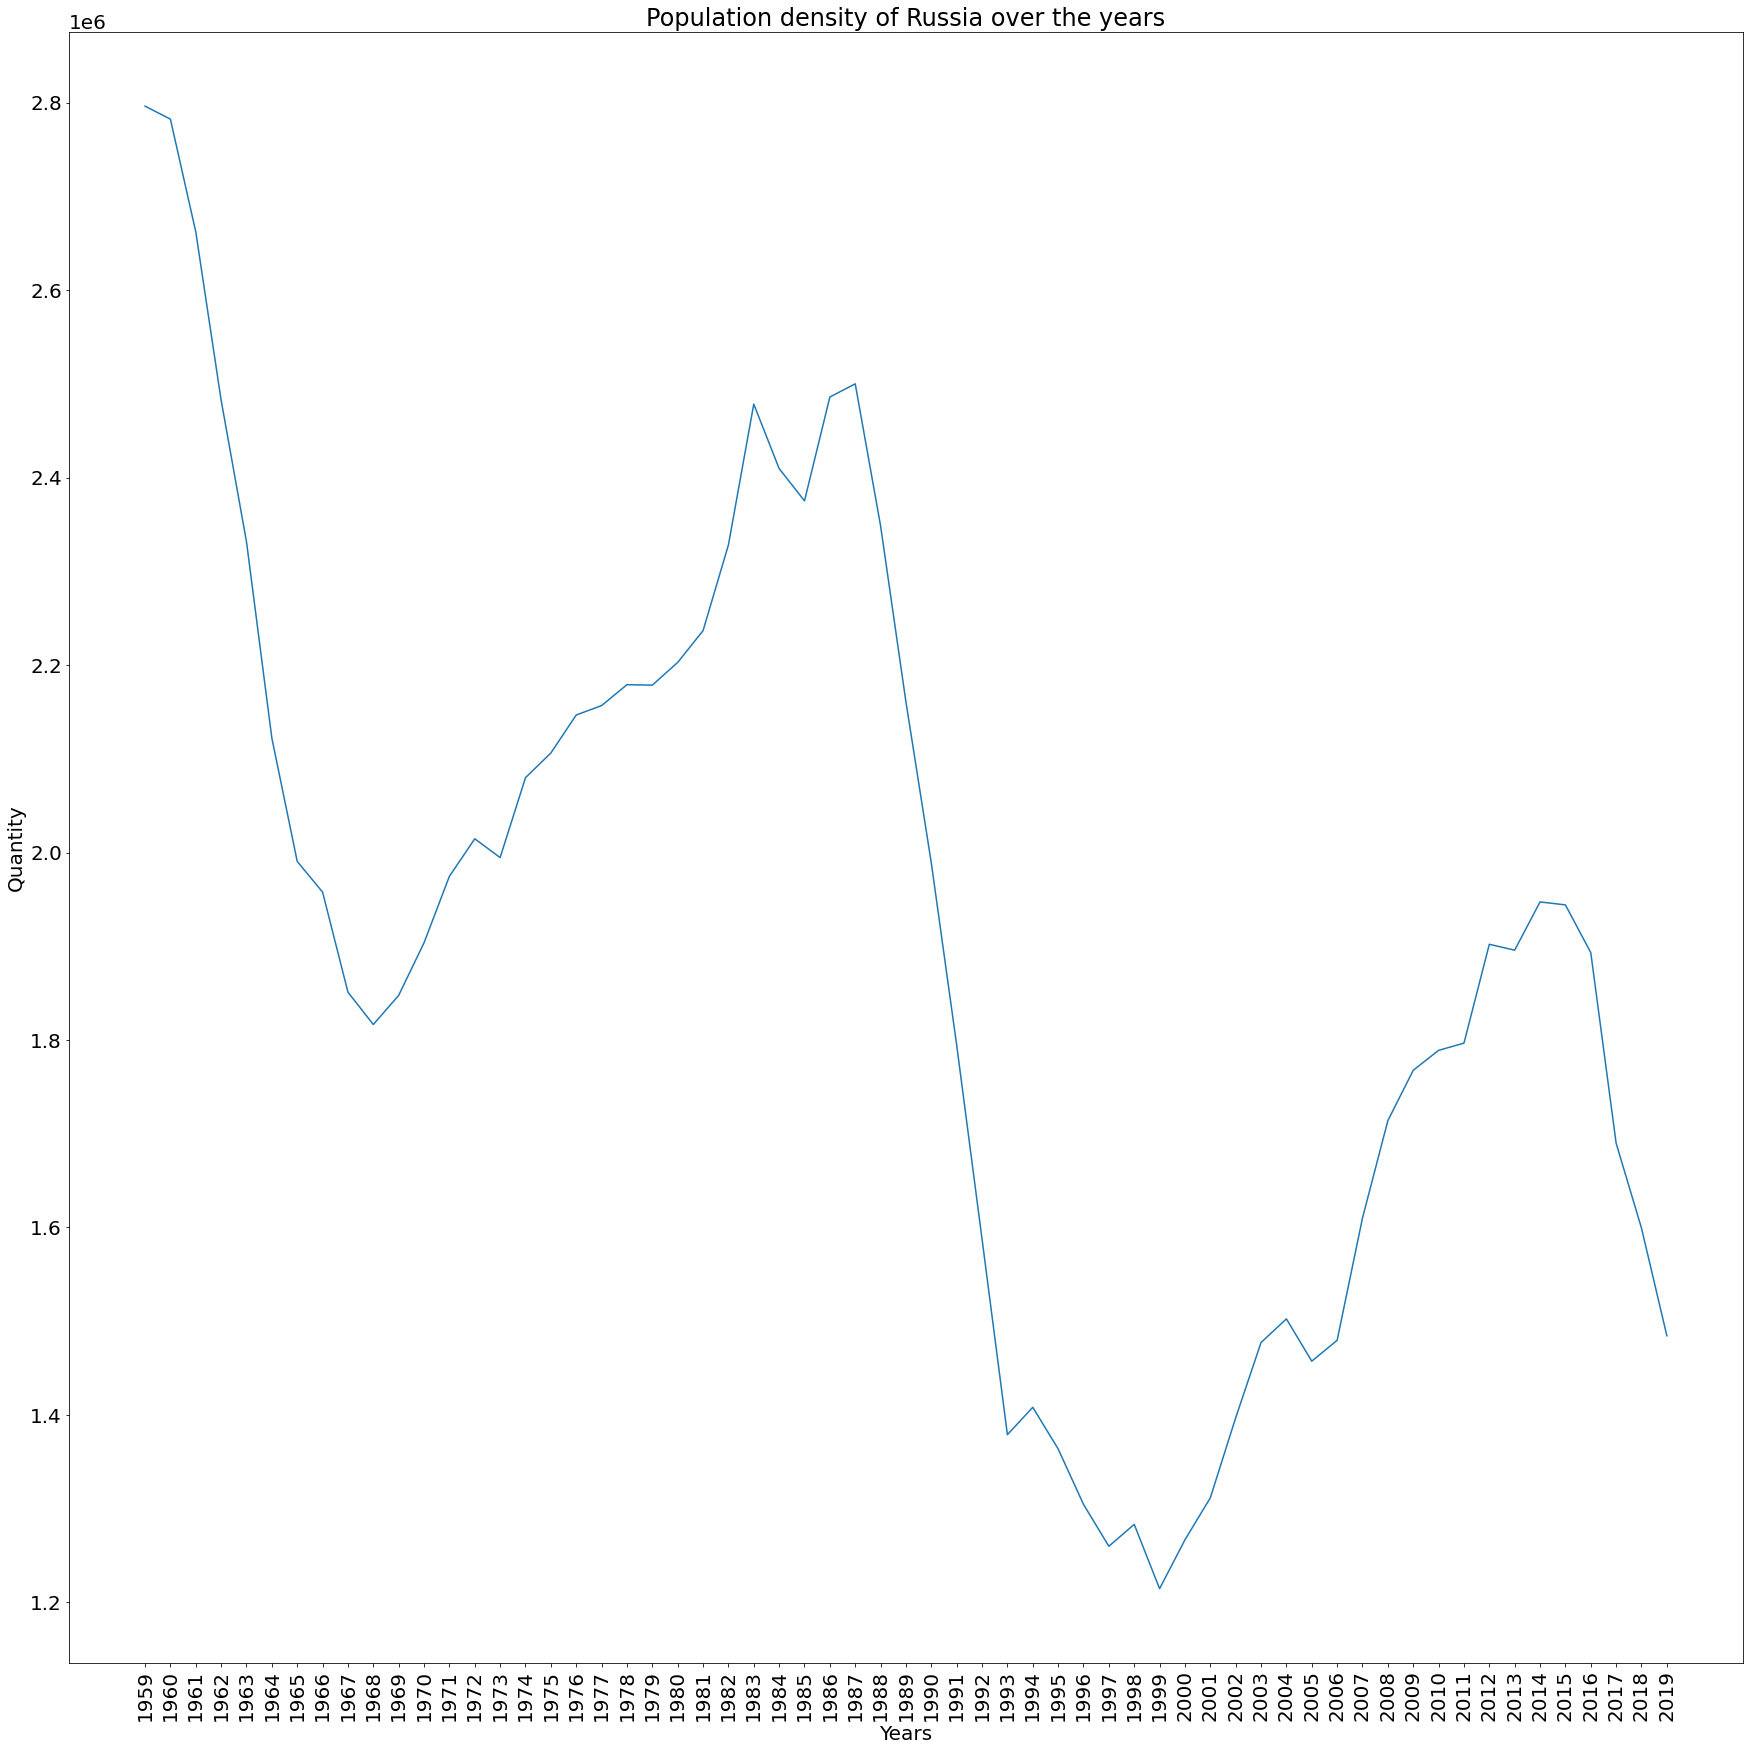

In [125]:
plt.rcParams['figure.figsize'] = (30, 30)
plt.rcParams['font.size'] = '20'
plt.xlabel('Years')
plt.ylabel('Quantity')
plt.xticks(rotation = '90')
plt.title('Population density of Russia over the years')
plt.plot(data['year'], data['quantity'])